## Script source
The original scripts are here: https://mantas.info/code/simple_esn/ (MIT License). The scripts are modified for this guest lecture and hands-on.  
Here just copy and paste the announcement from the original script:
> A minimalistic Echo State Networks demo with Mackey-Glass (delay 17) data in "plain" scientific Python.  
> from https://mantas.info/code/simple_esn/  
> (c) 2012-2020 Mantas Lukoševičius  
> Distributed under MIT license https://opensource.org/licenses/MIT

## Echo state network
A seminal RC framework, echo state network (ESN), was proposed by Jaeger (2002) and Jaeger et al. (2016). This model uses an recurrent neural network (RNN) based reservoir consisting of discrete-time artificial neurons. When the feedback from the output to the reservoir is absent, the time evolution of the neuronal states in the reservoir is described as:
$$
\boldsymbol{X}_{t+1} = \boldsymbol{f}(\boldsymbol{W}_{in} \boldsymbol{u}_t + \boldsymbol{W} \boldsymbol{X}_t ),
$$
where t denotes discrete time, $\boldsymbol{X}_t$ is the state vector of the reservoir units, $\boldsymbol{u}_t$ is the input vector, $\boldsymbol{W}_{in}$ is the weight matrix for the input-reservoir connections, and $\boldsymbol{W}$ is the weight matrix for the recurrent connections in the reservoir. The function $ \boldsymbol{f}$ represents an element-wise activation function of the reservoir units, which is typically a sigmoid-type activation function.

## Data upload (if you use Google Colab)
To upload the demo data, you first need to get `Lorenz_tau10.txt` from https://github.com/ong8181/OCES3301_guest/blob/main/data
Then, the data file should be placed somewhere in your Google Drive.

In [21]:
# Mount Google drive
#from google.colab import drive
#drive.mount('/content/drive')
#data = np.loadtxt('PATH_TO_DATA_FILE/Lorenz_tau10.txt')

## Implementation of echo state network (ESN)

Let's implement ESN with a few basic packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg 
# numpy.linalg is also an option for even fewer dependencies

In [22]:
# Load the data from local PC
data = np.loadtxt('data/Lorenz_tau10.txt')

# Specify training/test data length
trainLen = 590 # Training data length
testLen = 400 # Testing data length
initLen = 90 # Initial burn-in

Check how the data looks like.

Text(0.5, 1.0, 'A sample of data')

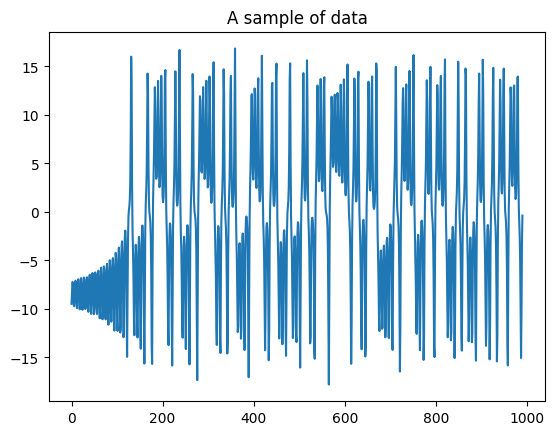

In [23]:
# plot some of it
plt.figure(10).clear()
plt.plot(data[:991])
plt.title('A sample of data')

Then let's generate the ESN reservoir.

In [111]:
# Input and output data size (= the number of variable)
inSize = outSize = 1

# Reservoir size (the number of nodes in the reservoir)
resSize = 300

In [112]:
# Set random seed
np.random.seed(42)

# Set input weight (how to transform input vector?)
Win = np.random.rand(resSize, inSize) - 0.5 # Subtracted 0.5 so that the center is 0

# Set reservoir weight  (how to transform reservoir state at each time step?)
W = np.random.rand(resSize, resSize) - 0.5 

# Normalizing and setting spectral radius (correct, slow):
print('Computing spectral radius...')
rhoW = max(abs(linalg.eig(W)[0]))
print('done.')

# The absolute value of the leading eigenvalue (= spectral radius) of W is now adjusted to 0.99
W *= 0.99 / rhoW 

Computing spectral radius...
done.


In [113]:
# Check paramters
print("Win =", Win)
print("\nW =", W)
print("\nrhoW =", rhoW)
print("\nAdjusted leading eigenvalue = ", max(abs(linalg.eig(W)[0])))

Win = [[-0.12545988]
 [ 0.45071431]
 [ 0.23199394]
 [ 0.09865848]
 [-0.34398136]
 [-0.34400548]
 [-0.44191639]
 [ 0.36617615]
 [ 0.10111501]
 [ 0.20807258]
 [-0.47941551]
 [ 0.46990985]
 [ 0.33244264]
 [-0.28766089]
 [-0.31817503]
 [-0.31659549]
 [-0.19575776]
 [ 0.02475643]
 [-0.06805498]
 [-0.20877086]
 [ 0.11185289]
 [-0.36050614]
 [-0.20785535]
 [-0.13363816]
 [-0.04393002]
 [ 0.28517596]
 [-0.30032622]
 [ 0.01423444]
 [ 0.09241457]
 [-0.45354959]
 [ 0.10754485]
 [-0.32947588]
 [-0.43494841]
 [ 0.44888554]
 [ 0.46563203]
 [ 0.30839735]
 [-0.19538623]
 [-0.40232789]
 [ 0.18423303]
 [-0.05984751]
 [-0.37796177]
 [-0.00482309]
 [-0.46561148]
 [ 0.4093204 ]
 [-0.24122002]
 [ 0.16252228]
 [-0.18828892]
 [ 0.02006802]
 [ 0.04671028]
 [-0.31514554]
 [ 0.46958463]
 [ 0.27513282]
 [ 0.43949894]
 [ 0.39482735]
 [ 0.09789998]
 [ 0.42187424]
 [-0.4115075 ]
 [-0.30401714]
 [-0.45477271]
 [-0.17466967]
 [-0.11132271]
 [-0.22865097]
 [ 0.32873751]
 [-0.14324667]
 [-0.21906549]
 [ 0.04269608]
 [-0

Prepare some objects that store results.

In [114]:
# Allocated memory for the design (collected states) matrix
X = np.zeros((resSize, trainLen - initLen))

# Set the corresponding target matrix directly
Yt = data[None, initLen+1:trainLen+1] 

In [115]:
# Check parameters
print("X = ", X)
print("\nX.shape  =", X.shape)
print("\nYt = ", Yt)
print("\nYt.shape  =", Yt.shape)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

X.shape  = (300, 500)

Yt =  [[ -4.7609079   -6.48137199  -9.82388593 -12.24088342  -9.80108876
   -5.85080315  -4.22116     -4.85782317  -7.44356087 -11.33017409
  -12.26467616  -8.06211516  -4.5048723   -3.67667244  -4.92698852
   -8.1935158  -12.42890553 -11.93090098  -6.70680985  -3.49322665
   -3.03111909  -4.45976117  -8.00260554 -12.91523023 -12.42253862
   -6.30338981  -2.67027309  -1.92277156  -2.7663184   -5.33908648
  -10.59189706 -14.93434286  -9.46163098  -2.95041393  -0.49223606
    0.19118046   0.58113318   1.32218557   3.21767726   8.02251369
   16.00372276  13.0149863    2.67495434  -1.92661544  -4.06016873
   -6.79273944 -10.87016707 -12.71104191  -8.72762033  -4.63271565
   -3.38496145  -4.28170499  -7.17414356 -11.75311351 -12.94375535
   -7.77437244  -3.64543347  -2.56982972  -3.42116882  -6.17004943
  -11

In [116]:
# Run the reservoir with the data and collect X
x = np.zeros((resSize,1))
for t in range(trainLen):
    u = data[t]
    x = np.tanh( np.dot( Win, u) + np.dot( W, x ) )
    if t >= initLen:
        X[:,t-initLen] = x[:,0]

The reservoir states are recorded in `X`. Its dimension is `{300,500}`.  
The structure of `X` is as follows:
$$
\begin{pmatrix}
x_{1,1} & x_{1,2} & ... & x_{1,500} \\
... & ... & ... & ...\\
x_{i,1} & x_{i,2} & ... & x_{i,500} \\
... & ... & ... & ...\\
x_{300,1} & x_{300,2} & ... & x_{300,500} \\
\end{pmatrix}
$$

Train output using a simple linear regression (ridge regression).

In [117]:
# train the output by ridge regression
reg = 1e-8  # regularization coefficient

# direct equations from texts:
#X_T = X.T
#Wout = np.dot( np.dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + \
#    reg*np.eye(1+inSize+resSize) ) )

# using scipy.linalg.solve:
Wout = linalg.solve( np.dot(X,X.T) + reg*np.eye(resSize), np.dot(X,Yt.T) ).T

Coefficients: [[ 1.02549273e+01  9.57686333e+00  3.42883949e+01 -2.06644162e+01
   4.11638274e+00  1.00162210e+01 -9.49099005e+00  1.49663131e+01
  -9.36860093e+00  1.47339135e+01  2.69102381e+01  2.26324418e+01
   5.79703405e+00 -1.17675893e+01 -6.54334755e+01  1.82588567e+01
  -5.26424670e-02  1.68738201e+01 -3.81290175e+00  3.01347968e+01
   1.38054137e+01 -3.44873314e+00  1.58388739e+01  7.49630558e+00
  -3.55993464e+00 -4.12037360e+01  3.93734753e+01 -7.95647715e-01
   2.09722307e+01  3.28529239e+01  2.14388344e+01 -6.35624708e+01
  -5.00689356e+00  1.29777210e-01 -2.68426016e+01  1.02976428e+01
   6.58591899e+01 -9.51421990e+00 -7.52291425e+00  1.52157791e+01
  -2.10355381e+01  8.72619337e+00 -8.11460903e+01 -1.05354424e+02
   2.70169528e+01 -7.79893428e+00 -4.32903656e+01  7.24363571e+00
  -7.24192698e+00  3.94933633e+00 -3.39196932e+00 -1.54506058e+01
   4.91782756e+00  1.41208593e+01 -1.49128763e+00 -3.26339581e+01
   4.15621267e+01 -3.25699146e+01 -2.43616616e+01 -1.12242253e

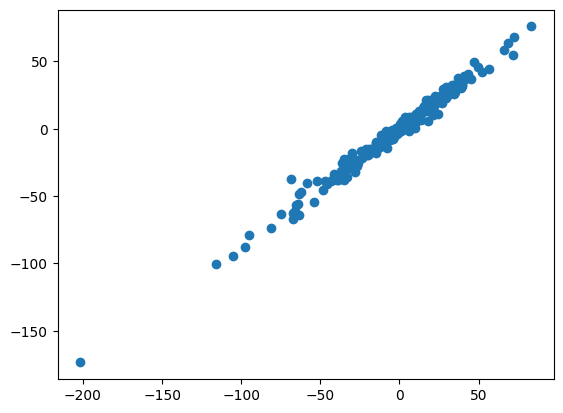

In [118]:
# Or try a simple linear regression?
from sklearn.linear_model import LinearRegression

# Linear model
lm = LinearRegression()
# Fit model
lm.fit(X.T, Yt.T)
# Show fitting results
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

# Visualize the relationship between linear coefficients and Wout
plt.scatter(lm.coef_, Wout)

# Fitting new data
#predicted_y = lm.predict(new_data)

In [119]:
# Run the trained ESN in a generative mode. no need to initialize here, 
# because x is initialized with training data and we continue from there.
Y = np.zeros((outSize,testLen))
u = data[trainLen]
for t in range(testLen):
    x = np.tanh( np.dot( Win, u ) + np.dot( W, x ) )
    y = np.dot( Wout, x )
    Y[:,t] = y
    u = data[trainLen+t+1] 

Compute summary statistics and visualize the correlation.

## Visualize results
Visualize results using `plt` function.

Train MSE = 4.015952997486292e-05
Test MSE = 0.027693211073941456


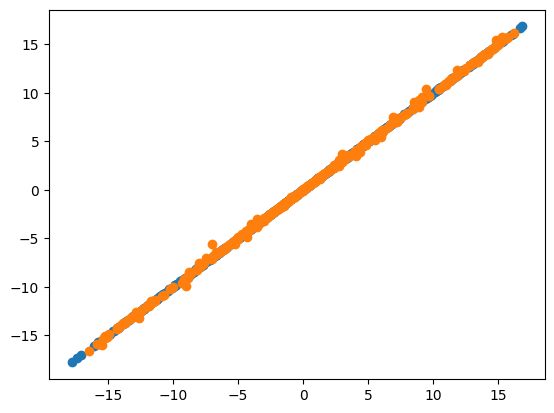

In [145]:
# Compute MSE for the test data
mse_train = sum( np.square( data[(initLen+1):(trainLen+1)] - np.dot(Wout, X)[0,0:trainLen] ) ) / trainLen
mse_test = sum( np.square( data[trainLen+1:trainLen+testLen+1] - Y[0,0:testLen] ) ) / testLen
print('Train MSE = ' + str( mse_train ))
print('Test MSE = ' + str( mse_test ))

# Visualize results
## Training data
plt.scatter(data[(initLen+1):(trainLen+1)], np.dot(Wout, X))
## Test data
plt.scatter(data[trainLen+1:trainLen+testLen+1],  Y[0,0:testLen])

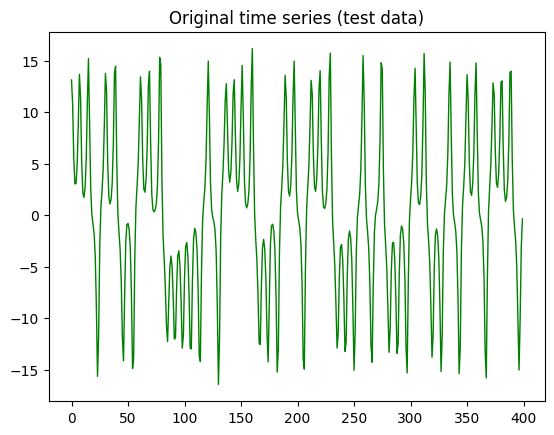

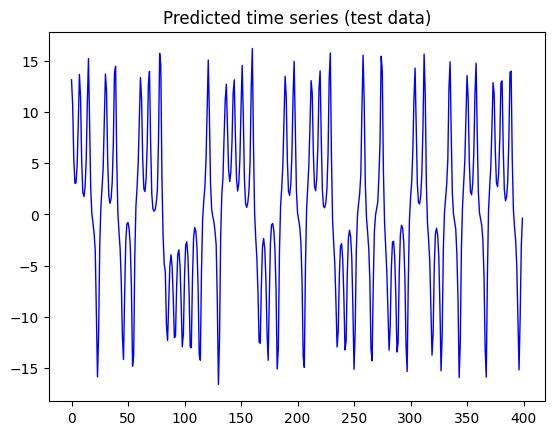

In [154]:
# Plot some signals
plt.figure(1).clear()
plt.plot( data[trainLen+1:trainLen+testLen+1], 'g' , linewidth = 1)
plt.title('Original time series (test data)')

plt.figure(2).clear()
plt.plot( Y.T, 'b', linewidth = 1)
plt.title('Predicted time series (test data)')
plt.show()


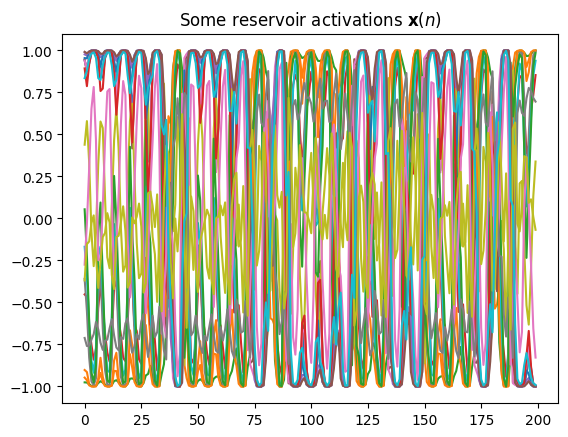

In [157]:
plt.figure(3).clear()
plt.plot( X[0:20,0:200].T )
plt.title(r'Some reservoir activations $\mathbf{x}(n)$')
plt.show()

## References
- Jaeger H. 2002 Tutorial on training recurrent neural networks, covering BPPT, RTRL, EKF and the" echo state network" approach. GMD-Forschungszentrum Informationstechnik Bonn.
- Jaeger H, Maass W, Principe J. 2007 Special issue on echo state networks and liquid state machines. Neural Netw. 20, 287–289. (doi:10.1016/j.neunet.2007.04.001)
-  https://mantas.info/code/simple_esn/